Bayesian Mean Estimate 

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

from pathlib import Path

from BME import bme


In [2]:
# Loading data
parent = Path(os.path.dirname(os.getcwd()))
date = "091027"
state = "cat2"

data_path = parent / "data" / "dataframes" / date
print(data_path)
data = pd.read_csv(data_path / (state + '.csv'))
# Convert to numpy array
x_values = np.array(data)
x_values = np.swapaxes(x_values, 0, 1)

# Make array from 0 to 165 in steps of 15
thetas = np.arange(0, 166, 15)
# Convert to radians
thetas = np.radians(thetas)
theta0 = np.deg2rad(147)
x0 = -0.08

theta0 = 0
x0 = 0

N = 10
nrho = 10000
num_bins = 200
eps=0.001

rho_est = bme(thetas-theta0, 
              x_values-x0,
              num_bins=num_bins,
              nrho=nrho,
              N=N,
              eps=eps
              )
print(rho_est)
np.save("rho_est.npy", rho_est)



/Users/jansc/Documents/QIS/Spring2025/SCIQIS/Homodyne-Tomography/data/dataframes/091027
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 4152.04it/s]

[[ 2.47534897e-01+0.00000000e+00j  4.03626931e-02-6.89791020e-03j
   5.28504618e-02-1.27151139e-01j -1.16723671e-02-5.59462403e-03j
  -3.22907586e-02-3.10295360e-02j -2.74810564e-04+3.57107135e-03j
  -8.82224086e-03+2.10315668e-03j  2.03428512e-03+5.14292401e-04j
  -7.00259299e-04+7.02302173e-04j -1.74245724e-04-6.27684982e-04j]
 [ 4.03626931e-02+6.89791020e-03j  5.20860141e-01+0.00000000e+00j
  -6.45192689e-02-5.98798835e-02j  6.95654088e-02-1.42547220e-01j
  -3.60265161e-02+1.20251124e-02j -2.39391370e-02-3.12040963e-02j
   1.65899355e-03+1.24602722e-02j -9.14137170e-03+6.62581163e-04j
   3.68876349e-03+3.83904137e-04j -1.92556895e-03+3.14344460e-03j]
 [ 5.28504618e-02+1.27151139e-01j -6.45192689e-02+5.98798835e-02j
   1.24553409e-01+0.00000000e+00j -4.35076996e-04+2.03726286e-02j
   1.74526754e-02-3.86467492e-02j  2.32462932e-03+5.14705876e-03j
  -6.15279385e-03-8.82672457e-03j  1.44976315e-03+1.21443581e-03j
  -1.40677714e-03-2.37661134e-04j  6.66736418e-04-9.64531301e-04j]
 [-1.16

In [3]:
# Global plot style settings
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Serif"],
    "mathtext.fontset": "cm",            # Use Computer Modern for math
    "font.size": 14,                     # Base font size
    "axes.labelsize": 16,                # Axis label font size
    "axes.titlesize": 16,                # Title font size
    "legend.fontsize": 13,               # Legend font size
    "xtick.labelsize": 13,               # X tick label size
    "ytick.labelsize": 13,               # Y tick label size
    "axes.linewidth": 1.2,               # Thicker axis lines
    "xtick.direction": "in",             # x-yick direction
    "ytick.direction": "in",             # y-tick direction
    "text.usetex": False,                # Enable LaTeX if needed
    "figure.dpi": 150,                   # Good resolution for screens
    "savefig.dpi": 300                   # High resolution for saving
})

In [4]:
from WignerDensity import rho_to_Wigner

# Define function for nice plotting
def PlotSettings(ax, gridlines=False, minimalist=False):
    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    # Minimalist style
    if minimalist:
        # Hide top and right spines (borders)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # Ticks only on bottom and left
        ax.tick_params(which='both', top=False, right=False)
    else:
        # Tick parameters
        ax.tick_params(which='both', direction='in', top=True, right=True)
        ax.tick_params(which='major', length=7, width=1.2)
        ax.tick_params(which='minor', length=4, width=1)
    # Optional grid
    if gridlines:
        ax.grid(True, which="major", linestyle="--", linewidth=0.6, alpha=0.7)
        ax.grid(True, which="minor", linestyle=":", linewidth=0.5, alpha=0.4)

def plot_Wigner(rho_est):
    # Plot Wigner function
    xvec = np.linspace(-4, 4, 200)
    W = rho_to_Wigner(rho_est, xvec, xvec)
    X, Y = np.meshgrid(xvec, xvec)
    vmin, vmax = -1/np.pi, 1/np.pi
    levels = np.linspace(vmin, vmax, 41)  # force levels across full range

    fig, ax = plt.subplots(figsize=(6, 5))
    # Filled contours with transparency
    contour_filled = ax.contourf(X, Y, W, levels=levels,
                                cmap='seismic', alpha=0.8, vmin=vmin, vmax=vmax)
    # Colorbar
    cbar = fig.colorbar(contour_filled, ax=ax, ticks=[-1/np.pi, 1/np.pi])
    cbar.ax.set_yticklabels([r"$-1/\pi$", r"$1/\pi$"])  # custom tick labels if needed
    # Move axes to cross at (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    # Set x- and y-ticks skipping 0
    ax.set_xticks([-3, -2, -1, 1, 2, 3])
    ax.set_yticks([-3, -2, -1, 1, 2, 3])
    PlotSettings(ax, minimalist=True)
    plt.show()

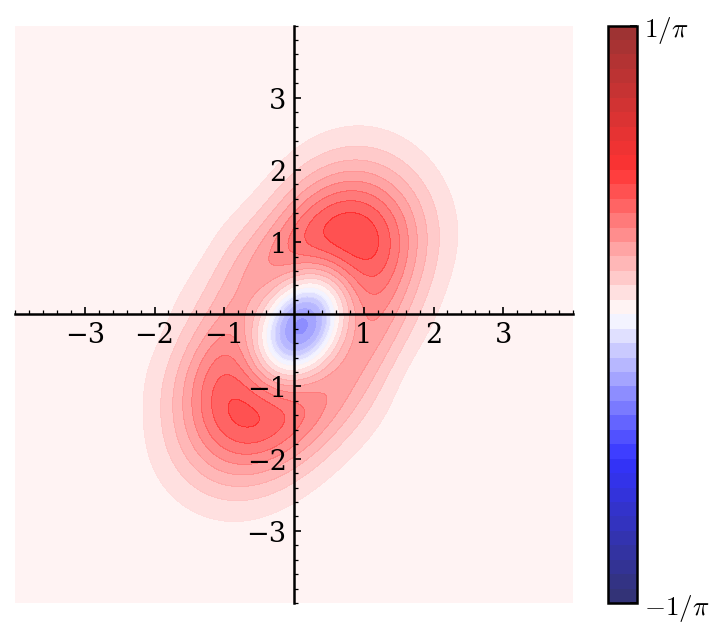

In [5]:
plot_Wigner(rho_est)